Project 1 (Python)  
Hung Nguyen

1b. Write the simCorn function in Python

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Define the simCorn function
def simCorn(overalEffect=0,fertilizerEffect=[0,0,0],rowEffect=[0,0,0],
            colEffect=[0,0,0],seed=None,dist=np.random.normal,*extra):
    
    # error checking
    if not np.isscalar(overalEffect): 
        raise ValueError("Invalid value of overalEffect. Need to be a number. Exit.")
    
    if len(fertilizerEffect) != 3:
        raise ValueError("Invalid value of fertilizerEffect. Need to have length of 3. Exit.")
    
    if len(rowEffect) != 3:
        raise ValueError("Invalid value of rowEffect. Need to have length of 3. Exit.")
    
    if len(colEffect) != 3:
        raise ValueError("Invalid value of colEffect. Need to have length of 3. Exit.")
    

    if seed is not None: np.random.seed(seed)
    
    Fertilizer = pd.Series(['A','B','C','C','A','B','B','C','A'])
    Row = pd.Series([1,1,1,2,2,2,3,3,3])
    Column = pd.Series([1,2,3,1,2,3,1,2,3])

    X = np.array([[1,1,0,0,1,0,0,1,0,0],
                [1,0,1,0,1,0,0,0,1,0],
                [1,0,0,1,1,0,0,0,0,1],
                [1,0,0,1,0,1,0,1,0,0],
                [1,1,0,0,0,1,0,0,1,0],
                [1,0,1,0,0,1,0,0,0,1],
                [1,0,1,0,0,0,1,1,0,0],
                [1,0,0,1,0,0,1,0,1,0],
                [1,1,0,0,0,0,1,0,0,1]])

    # set value of loc = 0 and scale = 1 for the default case
    if (dist == np.random.normal)and(len(extra)==0): extra = (0,1)
    # passing the extra parameters to the distribution function
    if len(extra)==1: error_vector = (dist(extra[0],size=9)).reshape(9,1)
    if len(extra)==2: error_vector = (dist(extra[0],extra[1],size=9)).reshape(9,1)
    
    OE_array = np.array([overalEffect]).reshape(1,1)
    FE_array = np.array(fertilizerEffect).reshape(3,1)
    RE_array = np.array(rowEffect).reshape(3,1)
    CE_array = np.array(colEffect).reshape(3,1)

    theta = np.concatenate([OE_array,FE_array,RE_array,CE_array])
    Y = np.add(np.dot(X,theta),error_vector)
    Z = pd.Series(Y.flatten())
    x = pd.DataFrame(data=dict(Fertilizer=Fertilizer,Row=Row,Column=Column,Yield=Z))
    return x

In [3]:
# Error testing
# 1
simCorn(10,[0,0,0,1],[0,0,0],[0,0,0],42544,np.random.normal,0,1)

ValueError: Invalid value of fertilizerEffect. Need to have length of 3. Exit.

In [4]:
# 2
simCorn([10,0],[1,2,3],[0,0,1],[0,0,1],7524,np.random.normal,0,1)

ValueError: Invalid value of overalEffect. Need to be a number. Exit.

In [6]:
# 3
simCorn(10,[1,2,3],[3,1,0,1],[0,1,1],75,np.random.normal,0,1)

ValueError: Invalid value of rowEffect. Need to have length of 3. Exit.

In [7]:
# 4
simCorn(10,[1,2,3],[0,1,0],[0,0],None,np.random.normal,0,1)

ValueError: Invalid value of colEffect. Need to have length of 3. Exit.

In [8]:
# Example testing
# Example 1
simCorn()

,Fertilizer,Row,Column,Yield
0,A,1,1,0.396991
1,B,1,2,-0.775812
2,C,1,3,-1.575012
3,C,2,1,-2.031110
4,A,2,2,0.310585
5,B,2,3,0.387435
6,B,3,1,1.420387
7,C,3,2,-0.121893
8,A,3,3,0.017234


In [9]:
# Example 2
simCorn(10,[0,0,0],[0,0,0],[0,0,0],2123,np.random.gamma,2)

,Fertilizer,Row,Column,Yield
0,A,1,1,12.700779
1,B,1,2,11.149439
2,C,1,3,15.368790
3,C,2,1,10.901597
4,A,2,2,11.742113
5,B,2,3,12.155515
6,B,3,1,11.901674
7,C,3,2,12.107528
8,A,3,3,10.390580


In [10]:
# Example 3
mu = 7
alpha = [1,2,3]
beta = [2,2,1]
gamma = [3,3,2]

simCorn(mu,alpha,beta,gamma,29429,np.random.normal,3,2)

,Fertilizer,Row,Column,Yield
0,A,1,1,16.836497
1,B,1,2,18.749914
2,C,1,3,20.136163
3,C,2,1,24.599134
4,A,2,2,18.519364
5,B,2,3,17.978359
6,B,3,1,14.558743
7,C,3,2,19.982285
8,A,3,3,11.942614


3b. Use the simCorn function to run simulation

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
n = 100 # number of data sets for each simulation

In [12]:
# create the function for simulation and draw histogram
def createHist(sim_number,mu=0,alpha=[0,0,0],beta=[0,0,0],gamma=[0,0,0],
               seed=None,dist=np.random.normal,*extra):
    
    if seed is not None: np.random.seed(seed)

    # create an empty array with 100 elements
    pValues = np.zeros(shape=(n))

    for i in range(0,n):
        # passing proper value for extra
        if (dist == np.random.normal)and(len(extra)==0): # default case
            y = simCorn(mu,alpha,beta,gamma,None,dist,0,1)
        if len(extra)==1: 
            y = simCorn(mu,alpha,beta,gamma,None,dist,extra[0])
        if len(extra)==2: 
            y = simCorn(mu,alpha,beta,gamma,None,dist,extra[0],extra[1]) 
        
        mod = ols('Yield~Fertilizer+Row+Column',data=y).fit()
        aov_table = sm.stats.anova_lm(mod,typ=2)
        df = pd.DataFrame(aov_table)
        df.rename(columns={'sum_sq':'SS', 'df':'DF', 'F':'F', 'PR(>F)':'PV'}, inplace=True)
        pValues[i] = df.PV[1]

    # count percentage of value < 0.05
    pct = len(pValues[pValues <= 0.05]) 
    
    plt.hist(pValues,bins=20,color='blue')
    plt.title('Simulation ' + str(sim_number) + ' (' + str(pct) + '% less than 0.05)')
    plt.xlabel('p values')
    plt.ylabel('Frequency')
    plt.axvline(x=0.05,color='red')

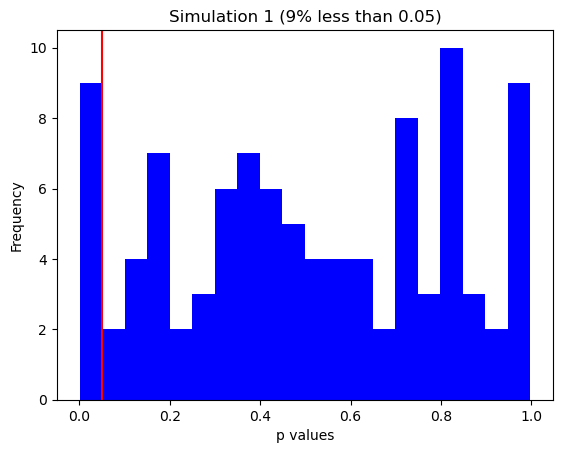

In [13]:
# Run the 7 simulations:
createHist(1,10,[0,0,0],[0,0,0],[0,0,0],1331,np.random.normal,0,1)

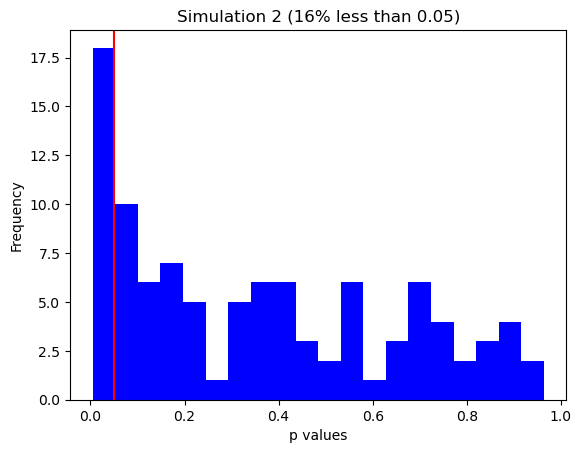

In [14]:
createHist(2,10,[1,2,3],[0,0,1],[0,0,1],18694,np.random.normal,0,1)

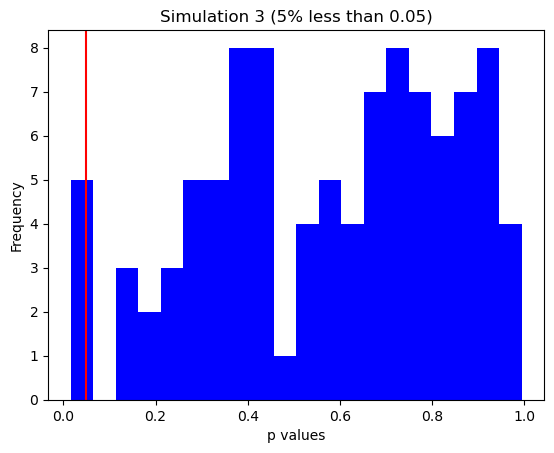

In [15]:
createHist(3,10,[1,2,3],[1,0,1],[0,1,1],6516,np.random.normal,0,1)

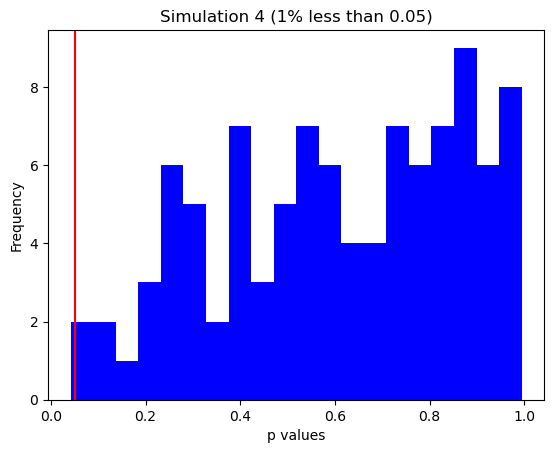

In [16]:
createHist(4,10,[1,2,3],[0,1,0],[0,1,0],5,np.random.normal,0,1)

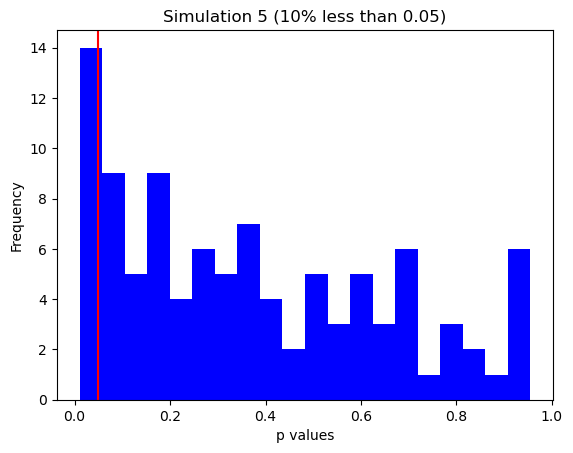

In [17]:
createHist(5,10,[1,2,3],[0,0,1],[0,0,1],574,np.random.exponential,1)

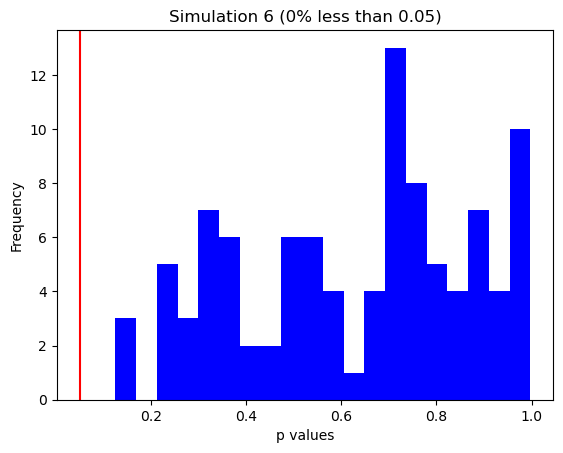

In [18]:
createHist(6,10,[1,2,3],[1,0,1],[0,1,1],9476,np.random.exponential,1)

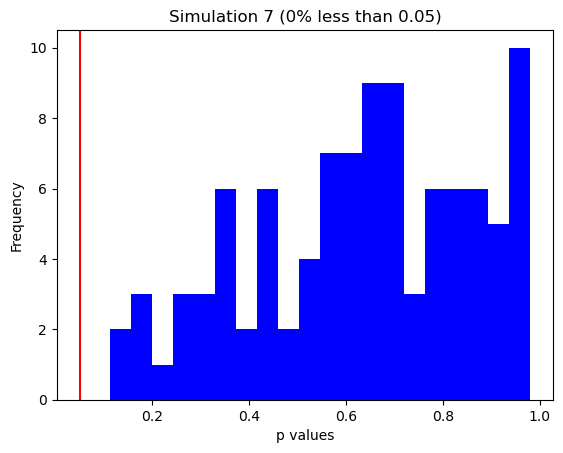

In [19]:
createHist(7,10,[1,2,3],[0,1,0],[0,1,0],9743,np.random.exponential,1)